In [2]:
print("hello")


hello


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('cm.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.columns = df.columns.str.lower()
df.columns


Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [8]:
df.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited']
df.columns

Index(['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'isactive_member', 'estimated_salary', 'exited'],
      dtype='object')

In [9]:
print(df.shape)
df.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   creditscore       10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  isactive_member   10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.dtypes

row_number            int64
customer_id           int64
surname              object
creditscore           int64
geography            object
gender               object
age                   int64
tenure                int64
balance             float64
num_of_products       int64
has_crcard            int64
isactive_member       int64
estimated_salary    float64
exited                int64
dtype: object

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
row_number,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
creditscore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
num_of_products,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
has_crcard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
isactive_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [17]:
df['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


In [18]:
print('Percentage of positive marks: {:.2%}'.format(df['exited'].mean()))

Percentage of positive marks: 20.37%


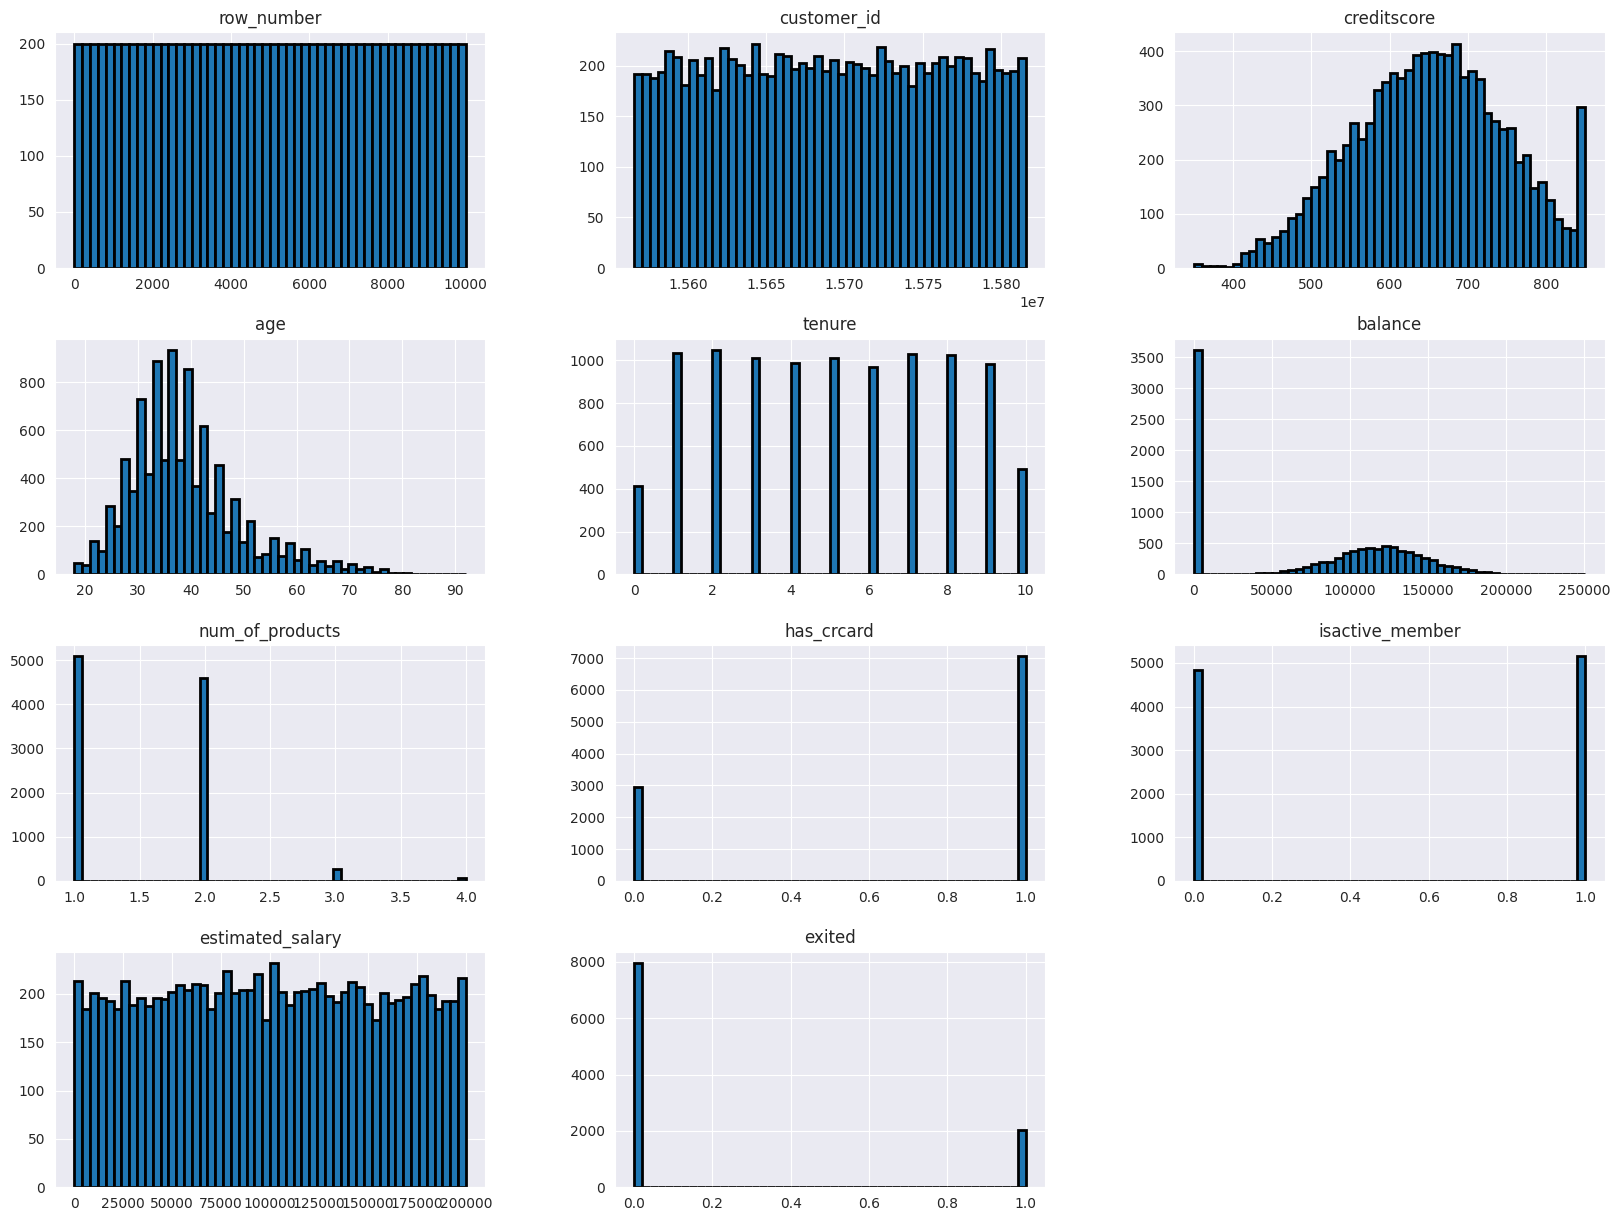

In [19]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

In [20]:
df.duplicated().sum()

0

In [21]:
df.head()

,row_number,customer_id,surname,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data = df.drop(['row_number', 'customer_id', 'surname'], axis=1).copy()
data.head()

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
data['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

In [24]:
data['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [25]:
# OHE of features
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)

# delete catfeatures
data.drop(["gender", "geography"], axis=1, inplace=True)

#concat new sets
df_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

df_ohe.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [26]:
country_ohe

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [27]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   creditscore       10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_crcard        10000 non-null  int64  
 6   isactive_member   10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   Male              10000 non-null  uint8  
 10  Germany           10000 non-null  uint8  
 11  Spain             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [28]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [29]:
features, target = split_data(df_ohe,'exited')

In [30]:
features_df, features_valid, target_df, target_valid = ( 
                                train_test_split(
                                features, target, test_size=0.20, random_state=42)
)

In [31]:
features_train, features_test, target_train, target_test = ( 
                                train_test_split(
                                features_df, target_df, test_size=0.25, random_state=42)
)

In [32]:
print('Objects of train:', len(features_train))
print('Objects of valid:', len(features_valid))
print('Objects of test:', len(features_test))
print('Sum of objects:', len(features_train) + len(features_test) + len(features_test))
print()
print('Objects of original set (check sum):', len(df_ohe))

Objects of train: 6000
Objects of valid: 2000
Objects of test: 2000
Sum of objects: 10000

Objects of original set (check sum): 10000


In [34]:
numeric = ['creditscore', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Male,Germany,Spain
8588,0.626553,-0.948125,7,0.026803,1,1,0,0.389943,0,0,1
3178,-1.143262,0.006684,4,0.538874,2,1,1,-1.026089,0,0,0
5200,-1.455583,0.293126,9,0.283178,2,1,0,-1.486725,1,1,0
8889,-0.747657,0.006684,9,0.833254,1,1,0,-0.246001,0,0,0
5789,0.387107,1.534377,1,0.000856,1,1,0,-1.006993,0,1,0


In [35]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Male,Germany,Spain
6252,596.0,32.0,3,9.670907e+04,2,0,0,41788.37,1,1,0
4684,623.0,43.0,1,1.136868e-16,2,1,1,146379.30,1,0,0
1731,601.0,44.0,4,1.136868e-16,2,1,0,58561.31,0,0,1
4742,506.0,59.0,8,1.191521e+05,2,1,1,170679.74,1,1,0
4521,560.0,27.0,7,1.249960e+05,1,1,1,114669.79,0,0,1


In [36]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,isactive_member,estimated_salary,Male,Germany,Spain
3188,801.0,32.0,4,7.517054e+04,1,1,1,37898.50,0,0,0
8293,766.0,28.0,4,9.069678e+04,1,0,1,21597.20,0,1,0
1710,828.0,28.0,8,1.347669e+05,1,1,0,79355.87,1,0,1
7510,798.0,36.0,1,1.136868e-16,2,1,1,159044.10,1,0,0
1461,611.0,34.0,4,1.136868e-16,2,1,0,170950.58,1,0,1


In [39]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.35756154747948415


In [40]:
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.35398230088495575


In [41]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.29540636042402824


In [42]:
model = RandomForestClassifier(random_state=42, n_estimators=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.23184713375796182


In [44]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.1 MB/s eta 0:00:00


In [45]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=100, random_state=42)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.022141
0:	learn: 0.6745313	total: 65.2ms	remaining: 1m 5s
100:	learn: 0.3380208	total: 2.44s	remaining: 21.8s
200:	learn: 0.3123563	total: 4.93s	remaining: 19.6s
300:	learn: 0.2984687	total: 6.52s	remaining: 15.2s
400:	learn: 0.2856855	total: 7.29s	remaining: 10.9s
500:	learn: 0.2734673	total: 8s	remaining: 7.97s
600:	learn: 0.2630656	total: 8.79s	remaining: 5.84s
700:	learn: 0.2535317	total: 9.73s	remaining: 4.15s
800:	learn: 0.2440192	total: 10.6s	remaining: 2.62s
900:	learn: 0.2355463	total: 11.5s	remaining: 1.26s
999:	learn: 0.2273826	total: 12.7s	remaining: 0us
F1: 0.38095238095238093


In [46]:
def upsample(features, target, repeat):
    
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled = shuffle(features_upsampled, random_state=12345)
    target_upsampled = shuffle(target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

    
    
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)

print(features_upsampled.shape)
print(target_upsampled.shape)

(10924, 11)
(10924,)


In [47]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.35398230088495575


In [48]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.2650334075723831


In [49]:

model = CatBoostClassifier(verbose=100, random_state=42)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.028597
0:	learn: 0.6778935	total: 27.8ms	remaining: 27.7s
100:	learn: 0.4288733	total: 1.04s	remaining: 9.29s
200:	learn: 0.3911263	total: 2.28s	remaining: 9.08s
300:	learn: 0.3629923	total: 2.92s	remaining: 6.79s
400:	learn: 0.3367207	total: 3.41s	remaining: 5.1s
500:	learn: 0.3142117	total: 3.92s	remaining: 3.9s
600:	learn: 0.2944586	total: 4.42s	remaining: 2.93s
700:	learn: 0.2766071	total: 5.61s	remaining: 2.39s
800:	learn: 0.2612087	total: 6.99s	remaining: 1.74s
900:	learn: 0.2460511	total: 7.67s	remaining: 843ms
999:	learn: 0.2329908	total: 8.14s	remaining: 0us
F1: 0.3436807095343681


In [50]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_sample = features_zeros.sample(frac=0.1, random_state=12345)
    target_sample = target_zeros.sample(frac=0.1, random_state=12345)
    
    features_downsampled = pd.concat([features_sample] + [features_ones])
    target_downsampled = pd.concat([target_sample] + [target_ones])
    
    features_downsampled = shuffle(features_downsampled, random_state=12345)
    target_downsampled = shuffle(target_downsampled, random_state=12345)
    

    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

print(features_downsampled.shape)
print(target_downsampled.shape)

(1708, 11)
(1708,)


In [51]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3487672880336741


In [52]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3641334062329141


In [53]:
model = CatBoostClassifier(verbose=100, random_state=42)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

Learning rate set to 0.012948
0:	learn: 0.6839908	total: 11.1ms	remaining: 11.1s
100:	learn: 0.4169449	total: 372ms	remaining: 3.31s
200:	learn: 0.3695972	total: 712ms	remaining: 2.83s
300:	learn: 0.3412328	total: 1.06s	remaining: 2.46s
400:	learn: 0.3209262	total: 1.49s	remaining: 2.23s
500:	learn: 0.3017571	total: 1.79s	remaining: 1.78s
600:	learn: 0.2846103	total: 1.96s	remaining: 1.3s
700:	learn: 0.2681391	total: 2.14s	remaining: 912ms
800:	learn: 0.2526019	total: 2.32s	remaining: 578ms
900:	learn: 0.2378843	total: 2.5s	remaining: 275ms
999:	learn: 0.2234935	total: 2.67s	remaining: 0us
F1: 0.34476693051890944


Threshold = 0.00 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.05 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.10 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.15 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.20 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.25 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.30 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.35 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.40 | Precision = 0.232, Recall = 0.776 | F1-score = 0.357
Threshold = 0.45 | Precision = 0.232, Recall = 0.776 | F1-score = 0.358
Threshold = 0.50 | Precision = 0.232, Recall = 0.776 | F1-score = 0.358
Threshold = 0.55 | Precision = 0.232, Recall = 0.776 | F1-score = 0.358
Threshold = 0.60 | Precision = 0.232, Recall = 0.774 | F1-score = 0.357
Threshold = 0.65 | Precision = 0.231, Recall = 0.771 | F1-score 

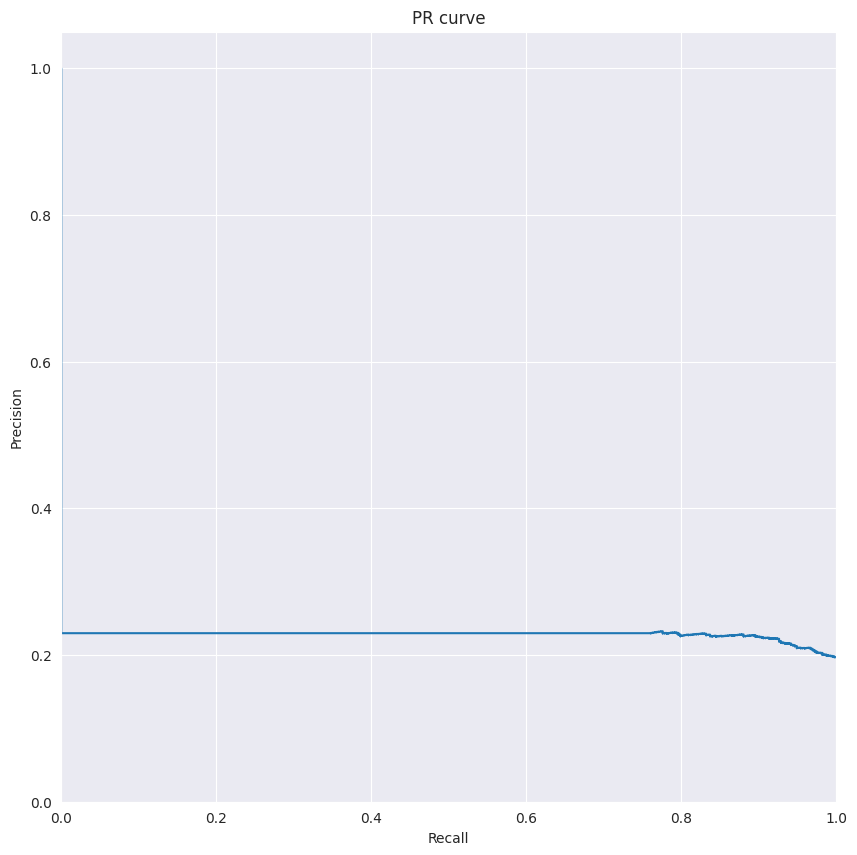

In [54]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

Threshold = 0.00 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.05 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.10 | Precision = 0.200, Recall = 0.985 | F1-score = 0.332
Threshold = 0.15 | Precision = 0.200, Recall = 0.985 | F1-score = 0.332
Threshold = 0.20 | Precision = 0.213, Recall = 0.977 | F1-score = 0.349
Threshold = 0.25 | Precision = 0.213, Recall = 0.977 | F1-score = 0.349
Threshold = 0.30 | Precision = 0.213, Recall = 0.875 | F1-score = 0.343
Threshold = 0.35 | Precision = 0.213, Recall = 0.875 | F1-score = 0.343
Threshold = 0.40 | Precision = 0.201, Recall = 0.730 | F1-score = 0.316
Threshold = 0.45 | Precision = 0.201, Recall = 0.730 | F1-score = 0.316
Threshold = 0.50 | Precision = 0.205, Recall = 0.532 | F1-score = 0.295
Threshold = 0.55 | Precision = 0.205, Recall = 0.532 | F1-score = 0.295
Threshold = 0.60 | Precision = 0.226, Recall = 0.382 | F1-score = 0.284
Threshold = 0.65 | Precision = 0.226, Recall = 0.382 | F1-score 

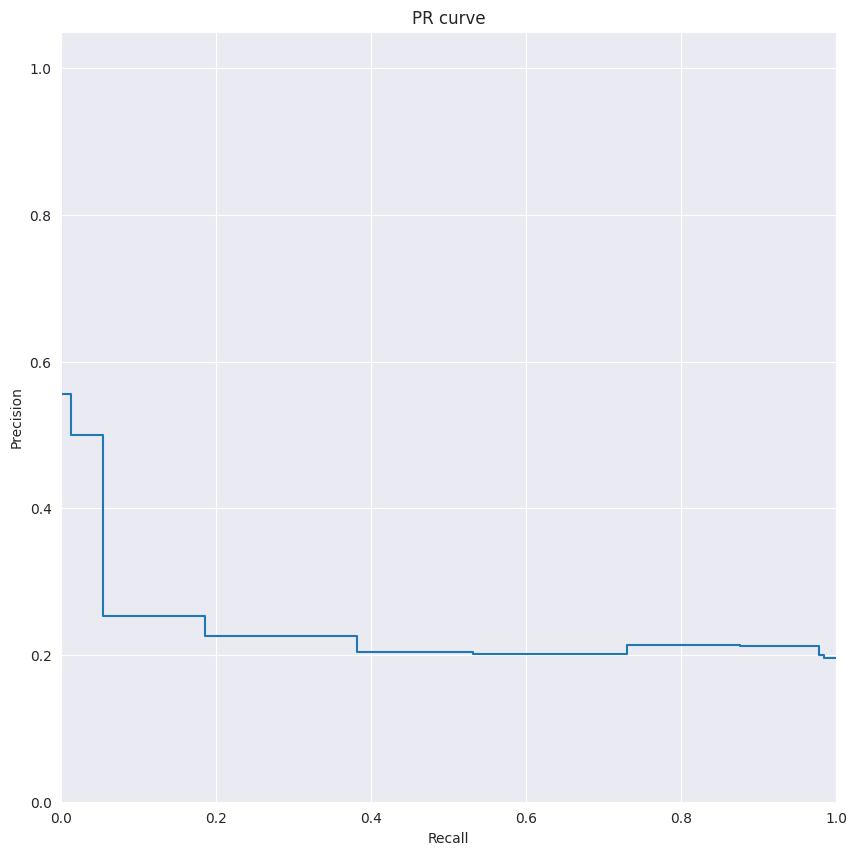

In [55]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

Threshold = 0.00 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.05 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.10 | Precision = 0.200, Recall = 0.985 | F1-score = 0.332
Threshold = 0.15 | Precision = 0.200, Recall = 0.985 | F1-score = 0.332
Threshold = 0.20 | Precision = 0.213, Recall = 0.977 | F1-score = 0.349
Threshold = 0.25 | Precision = 0.213, Recall = 0.977 | F1-score = 0.349
Threshold = 0.30 | Precision = 0.213, Recall = 0.875 | F1-score = 0.343
Threshold = 0.35 | Precision = 0.213, Recall = 0.875 | F1-score = 0.343
Threshold = 0.40 | Precision = 0.201, Recall = 0.730 | F1-score = 0.316
Threshold = 0.45 | Precision = 0.201, Recall = 0.730 | F1-score = 0.316
Threshold = 0.50 | Precision = 0.205, Recall = 0.532 | F1-score = 0.295
Threshold = 0.55 | Precision = 0.205, Recall = 0.532 | F1-score = 0.295
Threshold = 0.60 | Precision = 0.226, Recall = 0.382 | F1-score = 0.284
Threshold = 0.65 | Precision = 0.226, Recall = 0.382 | F1-score 

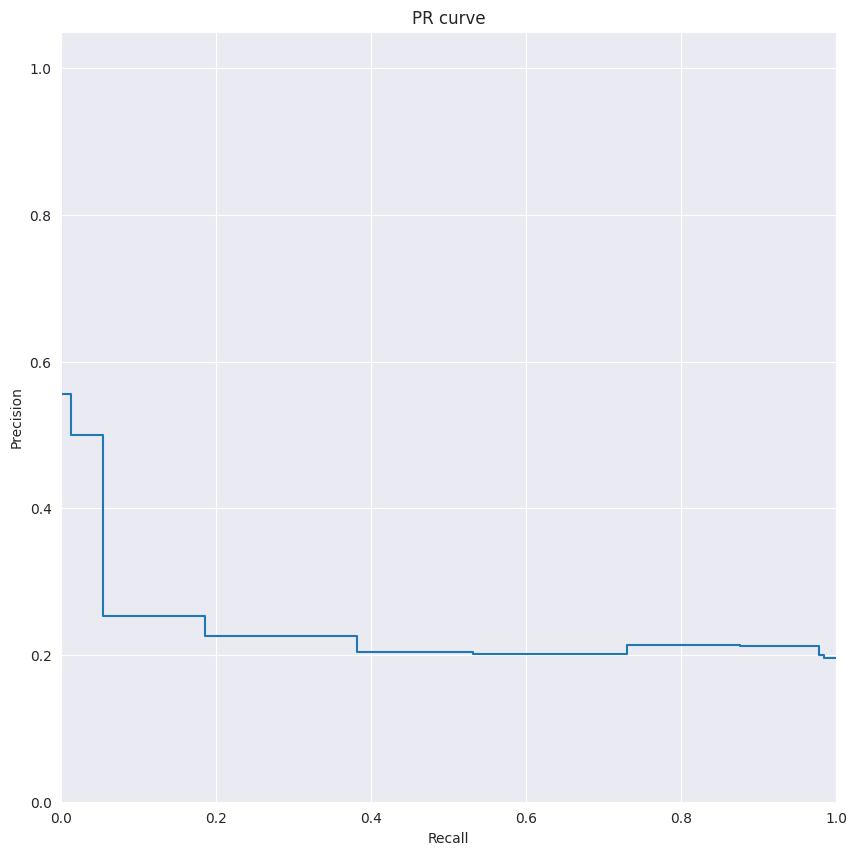

In [56]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))

precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])    
plt.figure(figsize=(10, 10))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('PR curve')
plt.show() 

In [57]:
par_grid_logist = {
                   'intercept_scaling': [0.5, 1.0, 1.5],
                   'class_weight': [None, 'balanced'],
                   'C': [0.5, 1, 1.5]
                   }
model = LogisticRegression(solver='liblinear',random_state=42)

grid_search = GridSearchCV(model, par_grid_logist, cv=5,
                           scoring='f1')
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': [None, 'balanced'],
                         'intercept_scaling': [0.5, 1.0, 1.5]},
             scoring='f1')

In [58]:
grid_search.best_params_

{'C': 1.5, 'class_weight': None, 'intercept_scaling': 0.5}

In [59]:
model_lreg = LogisticRegression(C=1.5, class_weight=None, intercept_scaling=0.5,
                                solver='liblinear', random_state=42
)
model_lreg.fit(features_upsampled, target_upsampled)
predicted_valid = model_lreg.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.35398230088495575


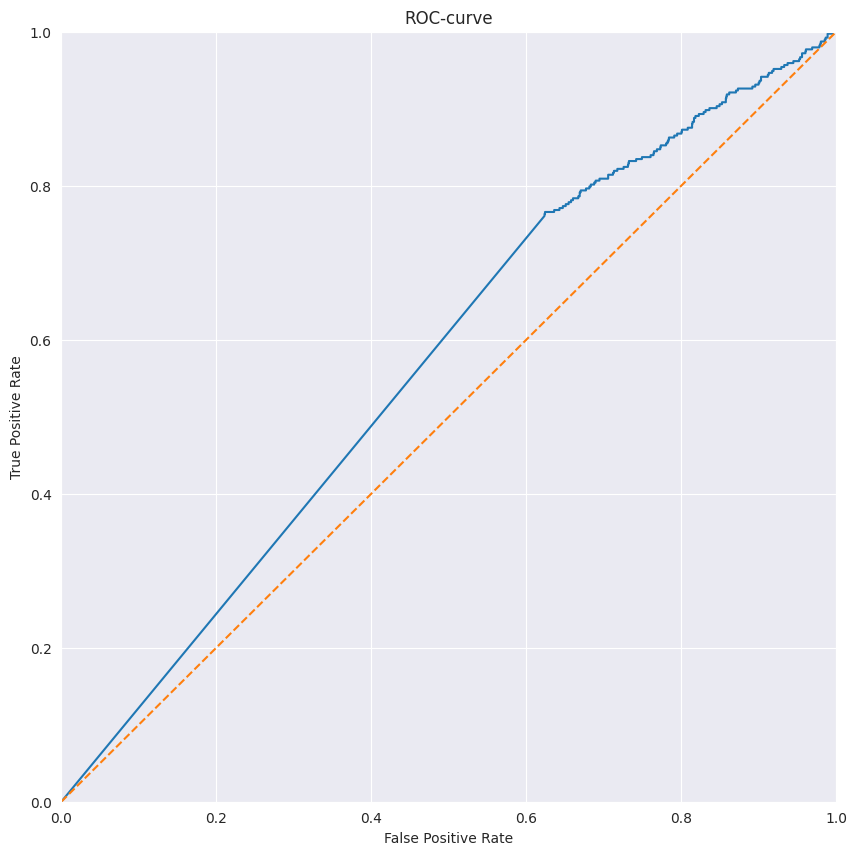

AUC: 0.5682375611787489


In [60]:
probabilities_valid = model_lreg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

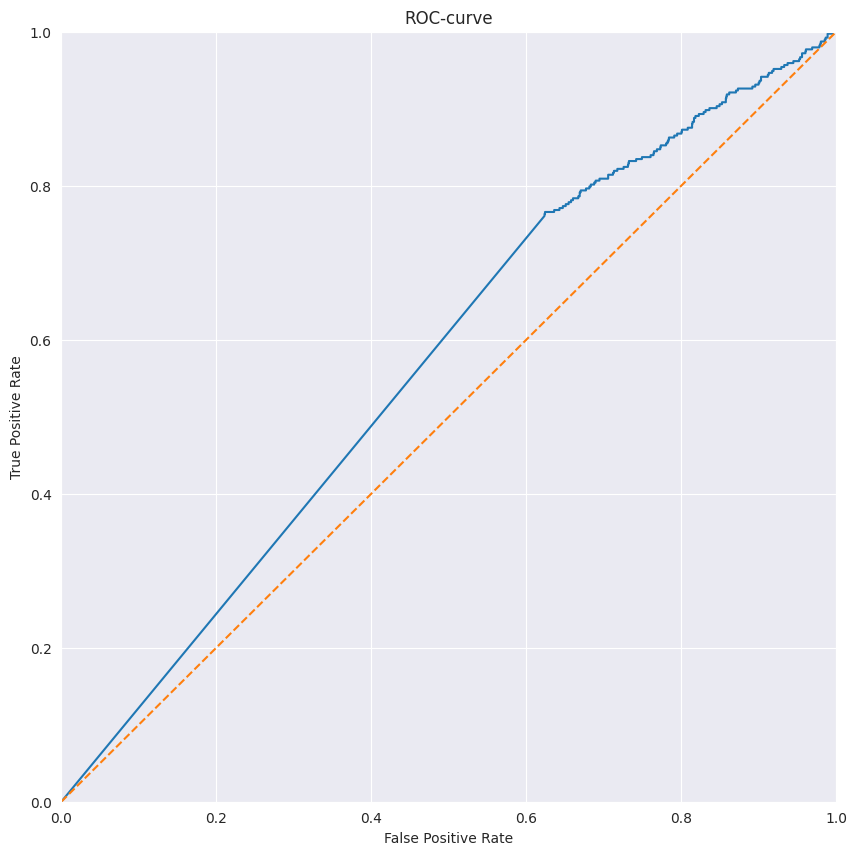

AUC: 0.5682375611787489


In [61]:
probabilities_valid = model_lreg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')

plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

In [62]:
par_grid_ensemble = {'n_estimators': [3, 10, 30],
                     'criterion': ['gini', 'entropy'],
                     'min_samples_split': range(5, 15)
                    }
model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(model, par_grid_ensemble, cv=5,
                           scoring='accuracy'
                          )
grid_search.fit(features_upsampled, target_upsampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': range(5, 15),
                         'n_estimators': [3, 10, 30]},
             scoring='accuracy')

In [63]:
grid_search.best_params_

{'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 30}

In [64]:
model_rfc = RandomForestClassifier(random_state=42, criterion='gini', 
                               min_samples_split=5, n_estimators=30
                              )
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid = model_rfc.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.21172022684310016


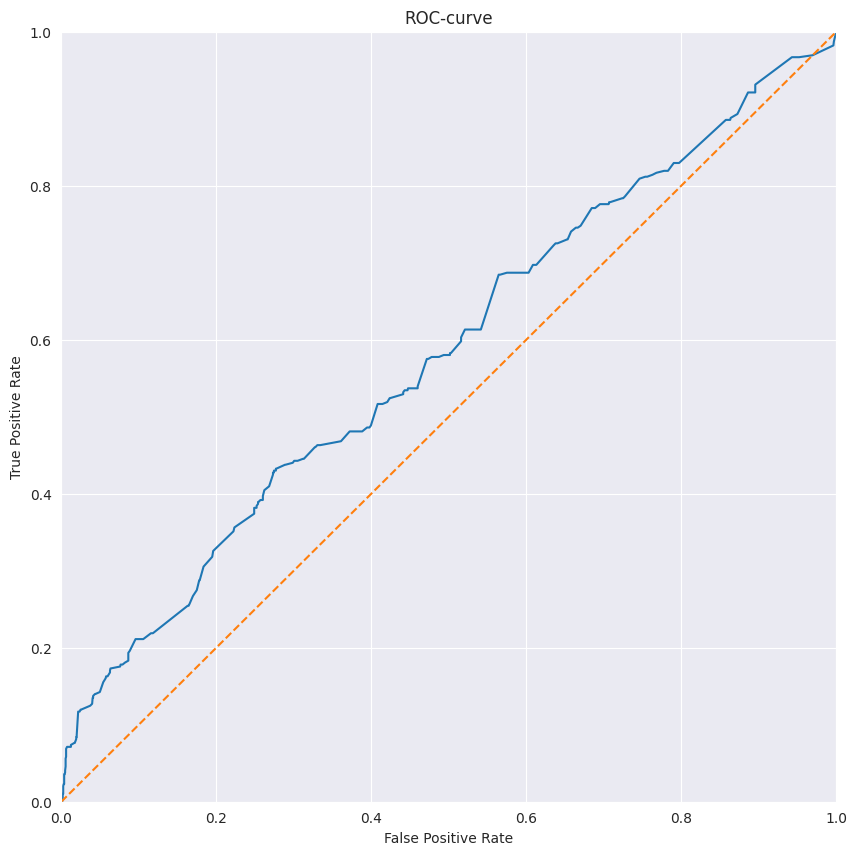

AUC: 0.5813275570777341


In [65]:
probabilities_valid = model_rfc.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

In [66]:
model_cat = CatBoostClassifier(
                           custom_loss=['F1'],
                           random_seed=42,
                           logging_level='Silent'
)

In [67]:
model_cat.fit(
          features_train, target_train,
          eval_set=(features_valid, target_valid)

)

In [69]:
from catboost import Pool, cv
cv_params = model_cat.get_params()
cv_params.update({
                 'loss_function': 'Logloss'
})
cv_data = cv(
             Pool(features_train, target_train),
             cv_params
)

In [70]:
print('F1-score: {}'.format(np.max(cv_data['test-F1-mean'])))

F1-score: 0.5967021094598414


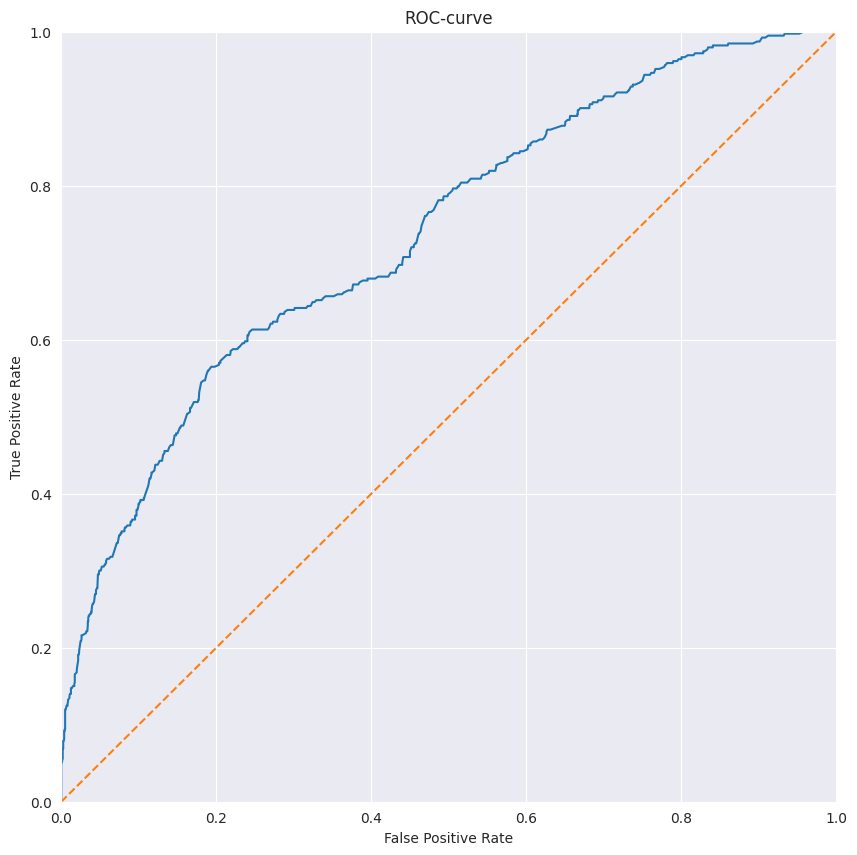

AUC: 0.7353428305869202


In [71]:
probabilities_valid = model_cat.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, linestyle='-')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()

auc_roc = roc_auc_score (target_valid, probabilities_one_valid)

print("AUC:", auc_roc)

In [72]:
table_of_model = []
table_of_prec = []
table_of_acc = []

In [73]:
predictions_test = model_lreg.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('LogisticRegression')

Accuracy
Test set: 0.4625
F1-мера
Test set: 0.36049970255800123


In [75]:
predictions_test = model_rfc.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('RandomForestClassifier')


Accuracy
Test set: 0.7835
F1-мера
Test set: 0.22540250447227192


In [76]:
model_rfc.feature_importances_

array([0.13322635, 0.25047014, 0.08095032, 0.14346871, 0.13229459,
       0.01696499, 0.03393928, 0.14376307, 0.0206356 , 0.02899979,
       0.01528717])

In [77]:
features_test.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'num_of_products',
       'has_crcard', 'isactive_member', 'estimated_salary', 'Male', 'Germany',
       'Spain'],
      dtype='object')

In [78]:
fi = pd.DataFrame({'name':features_test.columns,'fi':model_rfc.feature_importances_})
fi.sort_values('fi',ascending=False)

,name,fi
1,age,0.250470
7,estimated_salary,0.143763
3,balance,0.143469
0,creditscore,0.133226
4,num_of_products,0.132295
2,tenure,0.080950
6,isactive_member,0.033939
9,Germany,0.029000
8,Male,0.020636
5,has_crcard,0.016965


In [79]:
predictions = model_cat.predict(features_test)
test_f1 = f1_score(target_test, predictions_test)
test_acc = accuracy_score(target_test, predictions_test)

print("Accuracy")
print("Test set:", test_acc)
print("F1-мера")
print("Test set:", test_f1)

table_of_acc.append(round(test_acc, 2))
table_of_prec.append(round(test_f1, 2))
table_of_model.append('Catboost')

Accuracy
Test set: 0.7835
F1-мера
Test set: 0.22540250447227192


In [80]:
model_cat.feature_importances_

array([ 1.07042955, 27.72251367,  1.54216545,  8.5394967 , 40.55635223,
        0.55149244,  9.38891687,  1.037863  ,  2.23035481,  7.06589747,
        0.29451781])

In [81]:
fi_cat = pd.DataFrame({'name':features_test.columns,'fi_cat':model_cat.feature_importances_})
fi_cat.sort_values('fi_cat',ascending=False)

,name,fi_cat
4,num_of_products,40.556352
1,age,27.722514
6,isactive_member,9.388917
3,balance,8.539497
9,Germany,7.065897
8,Male,2.230355
2,tenure,1.542165
0,creditscore,1.070430
7,estimated_salary,1.037863
5,has_crcard,0.551492


In [85]:
table_of_models = (pd.DataFrame({'Model':table_of_model, 'Accuracy':table_of_acc, 
                                'F1 score':table_of_prec}).sort_values(by='F1 score', ascending=False).
                  reset_index(drop=True))
table_of_models['Threshold of testing'] = (
                   table_of_models['F1 score'].apply(lambda x: 'good model' if x>0.30 else 'bad model')
)
table_of_models

,Model,Accuracy,F1 score,Threshold of testing
0,LogisticRegression,0.46,0.36,good model
1,RandomForestClassifier,0.78,0.23,bad model
2,Catboost,0.78,0.23,bad model


In [84]:
target_const = target*0
acc_const = accuracy_score(target, target_const)


print("Accuracy")
print("const:", acc_const)

Accuracy
const: 0.7963


In [86]:
fi.sort_values('fi',ascending=False).reset_index(drop=True).head()

,name,fi
0,age,0.250470
1,estimated_salary,0.143763
2,balance,0.143469
3,creditscore,0.133226
4,num_of_products,0.132295
